# GGG Competition

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [430]:
data = pd.read_csv('./datasets/train.csv', index_col='id')
test = pd.read_csv('./datasets/test.csv', index_col='id')

In [431]:
ghoul_mask = data['type'] == 'Ghoul'
goblin_mask = data['type'] == 'Goblin'
ghost_mask = data['type'] == 'Ghost'

In [432]:
data.drop(data.sample(frac=1)[ghoul_mask].head(12).index, axis=0, inplace=True)
data.drop(data.sample(frac=1)[goblin_mask].head(8).index, axis=0, inplace=True)

c:\users\kmbs\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\kmbs\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [433]:
df = pd.concat([data.drop('type', axis=1), test], ignore_index=True)

In [434]:
data.head(3)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul


In [435]:
df.corr()

,bone_length,rotting_flesh,hair_length,has_soul
bone_length,1.000000,-0.033950,0.394905,0.386640
rotting_flesh,-0.033950,1.000000,-0.195120,-0.154915
hair_length,0.394905,-0.195120,1.000000,0.498784
has_soul,0.386640,-0.154915,0.498784,1.000000


In [436]:
numeric_cols = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']

for col in numeric_cols:
    df[col] = pd.cut(df[col], 15)

In [437]:
df.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color
0,"(0.333, 0.4]","(0.333, 0.4]","(0.4, 0.467]","(0.733, 0.8]",clear
1,"(0.533, 0.6]","(0.4, 0.467]","(0.467, 0.533]","(0.4, 0.467]",green
2,"(0.467, 0.533]","(0.333, 0.4]","(0.8, 0.867]","(0.733, 0.8]",black
3,"(0.533, 0.6]","(0.867, 0.933]","(0.4, 0.467]","(0.6, 0.667]",green
4,"(0.4, 0.467]","(0.2, 0.267]","(0.4, 0.467]","(0.267, 0.333]",green


In [438]:
cols = df.columns

In [439]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [440]:
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
    
y = le.fit_transform(data['type'])
types = le.classes_

In [441]:
# ohe = LabelBinarizer()

# ohe_cols = ['hair_length', 'has_soul']

# for col in ohe_cols:
#     one_hot_col = ohe.fit_transform(df[col].to_numpy())
    
#     cats = df[col].unique()
#     for i in range(len(cats)):
#         df[cats[i]] = one_hot_col.T[i]

In [442]:
df.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color
0,5,5,6,11,3
1,8,6,7,6,4
2,7,5,12,11,0
3,8,13,6,9,4
4,6,3,6,4,4


In [443]:
df.drop(['color'], axis=1, inplace=True)
train = df[:data.shape[0]]
test = df[data.shape[0]:]

In [444]:
df.head()

,bone_length,rotting_flesh,hair_length,has_soul
0,5,5,6,11
1,8,6,7,6
2,7,5,12,11
3,8,13,6,9
4,6,3,6,4


In [450]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(train, y)
predictions = model.predict(test)

In [451]:
submission_df = pd.read_csv('./datasets/sample_submission.csv', index_col='id')
submission_df['type'] = types[predictions]

submission_df.to_csv('./results/RandForest_raw.csv')

In [452]:
model.feature_importances_

array([0.11333316, 0.12569622, 0.46930327, 0.29166734])

In [448]:
bone_hair = data['bone_length'] / data['hair_length']

array([0, 1, 2])

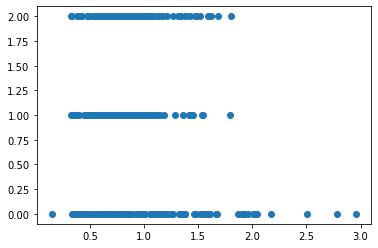

In [449]:
plt.scatter(bone_hair, y)
np.unique(y)

In [85]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# data['color'] = le.fit_transform(data['color'])
# test['color'] = le.fit_transform(test['color'])

# data['type'] = le.fit_transform(data['type'])

# y = data['type']
# data.drop('type', axis=1, inplace=True)

In [86]:
# types = le.classes_
# types

array(['Ghost', 'Ghoul', 'Goblin'], dtype=object)

In [61]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
# model.fit(data, y)
# predictions = model.predict(test)

In [62]:
# submission_df = pd.read_csv('./datasets/sample_submission.csv', index_col='id')
# submission_df['type'] = types[predictions]

# submission_df.to_csv('./results/RandForest_raw.csv')